C:\Users\Adhya Rajesh\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Adhya Rajesh\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Adhya Rajesh\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Adhya Rajesh\AppData\R

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0             6      148             72             35        0  33.60   
2             8      183             64             27        0  23.30   
4             0      137             40             35      168  43.10   
6             3       78             50             32       88  31.00   
8             2      197             70             45      543  30.50   
9             8      125             96             27        0  34.25   
11           10      168             74             27        0  38.00   
13            1      189             60             23      846  30.10   
14            5      166             72             19      175  25.80   
15            7      100             74             27        0  30.00   
16            0      118             84             47      230  45.80   
17            7      107             74             27        0  29.60   
19            1      115             7

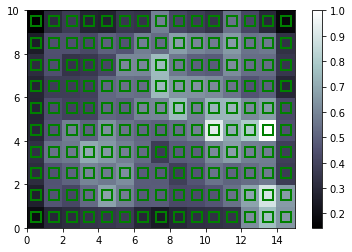

268
<class 'list'>
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64             27        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  


c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


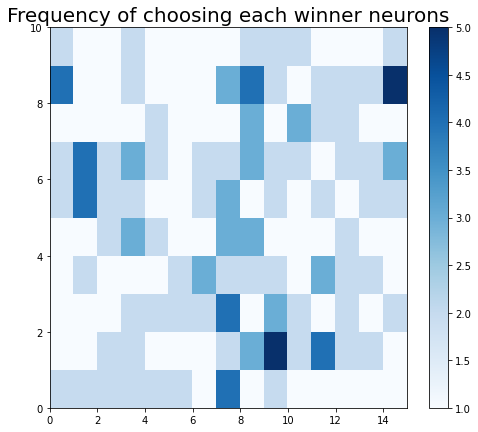

length of X: 268


<AxesSubplot:>

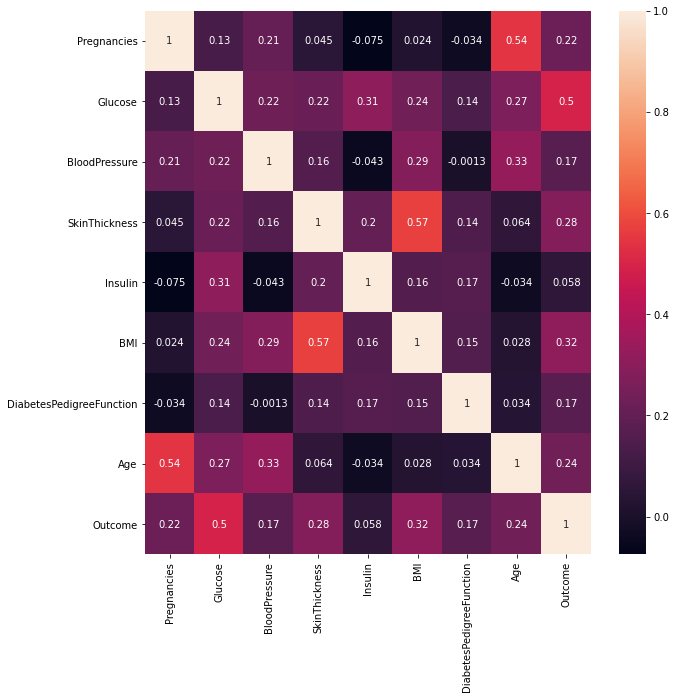

In [1]:
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize

from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
import sklearn.metrics
from SimpSOM import somNet
%matplotlib inline
# Importing the dataset 
dataset=pd.read_csv(r'C:\Users\Adhya Rajesh\Downloads\diabetes.csv')


df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for BMI
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)


#Replacing the zero-values for Glucose
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Insulin
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Skin Thickness
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

print(dataset.head(20))



X = dataset[dataset['Outcome']==1].iloc[:, :-1].values
y = dataset[dataset['Outcome']==1].iloc[:, -1].values

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X = (X - means)/stds
newdataset=dataset[dataset['Outcome']==1]
print(X)


# Training the SOM
from minisom import MiniSom

som = MiniSom(x=15, y=10, input_len=len(X.T),sigma=0.5,random_seed=10,learning_rate=1.8,
              neighborhood_function='gaussian')
som.random_weights_init(X)
som.train_batch(X, 10000, verbose=True)


som_shape=(15,10)
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)



# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
win=[]
for i, x in enumerate(X):
    w = som.winner(x)
    win.append(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

mappings = som.win_map(X)

print(len(X))
print(type(win))

newdataset['winner']=win
print(dataset.head())

plt.figure(figsize=(8, 7))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.title("Frequency of choosing each winner neurons",fontsize=20)
plt.show()

print("length of X:",len(X))



labels_map = som.labels_map(X, y)
label_names = np.unique(y)

plt.figure(figsize=(10, 10))

sns.heatmap(dataset.corr(),annot=True)

In [2]:
# Importing the libraries
import hebbian
import seaborn
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
from SimpSOM import somNet

model1=hebbian.Hebbian(eta=0.0005,n_iter=1)



newdataset['winner']=win
pdf=pd.DataFrame(win,columns=['p1','p2'])


pdf1=pdf.iloc[:, :].values
print("this is pdf1", pdf1)
print("the weight assigned to each input feature of the winner neuron using hebbian rule :")
model1.fit((np.array(pdf1)),(np.array(newdataset['Outcome'])))

ac=list(model1.net_input(np.array(pdf1)))
print("Net activation of every winner neuron from the input layer :",list(model1.net_input(np.array(pdf1))))
print("UPDATED WEIGHTS OF THE NETWORK",model1.w_)

this is pdf1 [[ 2  5]
 [ 0  3]
 [12  0]
 [12  9]
 [14  4]
 [ 5  3]
 [ 4  5]
 [13  4]
 [ 0  2]
 [ 7  4]
 [11  3]
 [ 7  4]
 [10  7]
 [ 3  4]
 [ 9  8]
 [ 3  1]
 [ 3  6]
 [ 3  5]
 [12  1]
 [ 3  8]
 [ 7  8]
 [ 7  7]
 [ 3  3]
 [13  1]
 [ 4  6]
 [ 1  1]
 [13  3]
 [ 6  3]
 [ 6  3]
 [ 9  6]
 [13  8]
 [ 5  5]
 [ 9  1]
 [ 4  4]
 [ 4  9]
 [ 0  9]
 [11  3]
 [11  0]
 [ 7  2]
 [ 6  1]
 [ 0  0]
 [14  5]
 [ 0  8]
 [ 8  2]
 [10  5]
 [ 7  2]
 [ 7  9]
 [ 5  2]
 [ 1  9]
 [14  8]
 [ 9  9]
 [12  6]
 [ 6  3]
 [ 3  2]
 [ 2  4]
 [ 8  5]
 [ 5  7]
 [ 9  6]
 [10  9]
 [ 7  4]
 [ 8  1]
 [13  2]
 [10  4]
 [ 8  4]
 [ 1  4]
 [ 0  0]
 [ 8  6]
 [10  8]
 [ 6  0]
 [ 1  5]
 [ 5  6]
 [12  3]
 [14  9]
 [ 7  8]
 [13  6]
 [ 1  0]
 [ 5  3]
 [ 3  4]
 [ 9  1]
 [ 6  4]
 [ 6  7]
 [ 7  8]
 [ 7  6]
 [ 7  3]
 [13  5]
 [ 0  8]
 [12  7]
 [10  1]
 [11  4]
 [ 9  2]
 [ 1  2]
 [10  0]
 [ 1  3]
 [13  9]
 [ 9  9]
 [ 1  3]
 [11  9]
 [ 9  0]
 [ 3  2]
 [11  1]
 [ 8  8]
 [11  1]
 [ 7  0]
 [ 6  5]
 [ 8  8]
 [ 9  1]
 [ 1  6]
 [ 0  9]
 [10  6]
 [ 8  

c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
print(dataset.columns)
df1=pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
print(df1.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  2.680000e+02  2.680000e+02   2.680000e+02   2.680000e+02  2.680000e+02   
mean  -9.610886e-17  1.325639e-17   1.590767e-16  -5.965377e-17  4.639738e-17   
std    1.001871e+00  1.001871e+00   1.001871e+00   1.001871e+00  1.001871e+00   
min   -1.302984e+00 -2.184644e+00  -3.799504e+00  -2.700525e+00 -7.248120e-01   
25%   -8.343495e-01 -7.916845e-01  -6.082340e-01  -4.528831e-01 -7.248120e-01   
50%   -2.318193e-01 -7.821767e-02  -1.043493e-01  -4.528831e-01 -7.248120e-01   
75%    8.393456e-01  8.390969e-01   5.674971e-01   5.585558e-01  4.833787e-01   
max    3.249466e+00  1.926284e+00   3.254882e+00   7.638628e+00  5.386574e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  2.680000e+02              2.680000e+02  

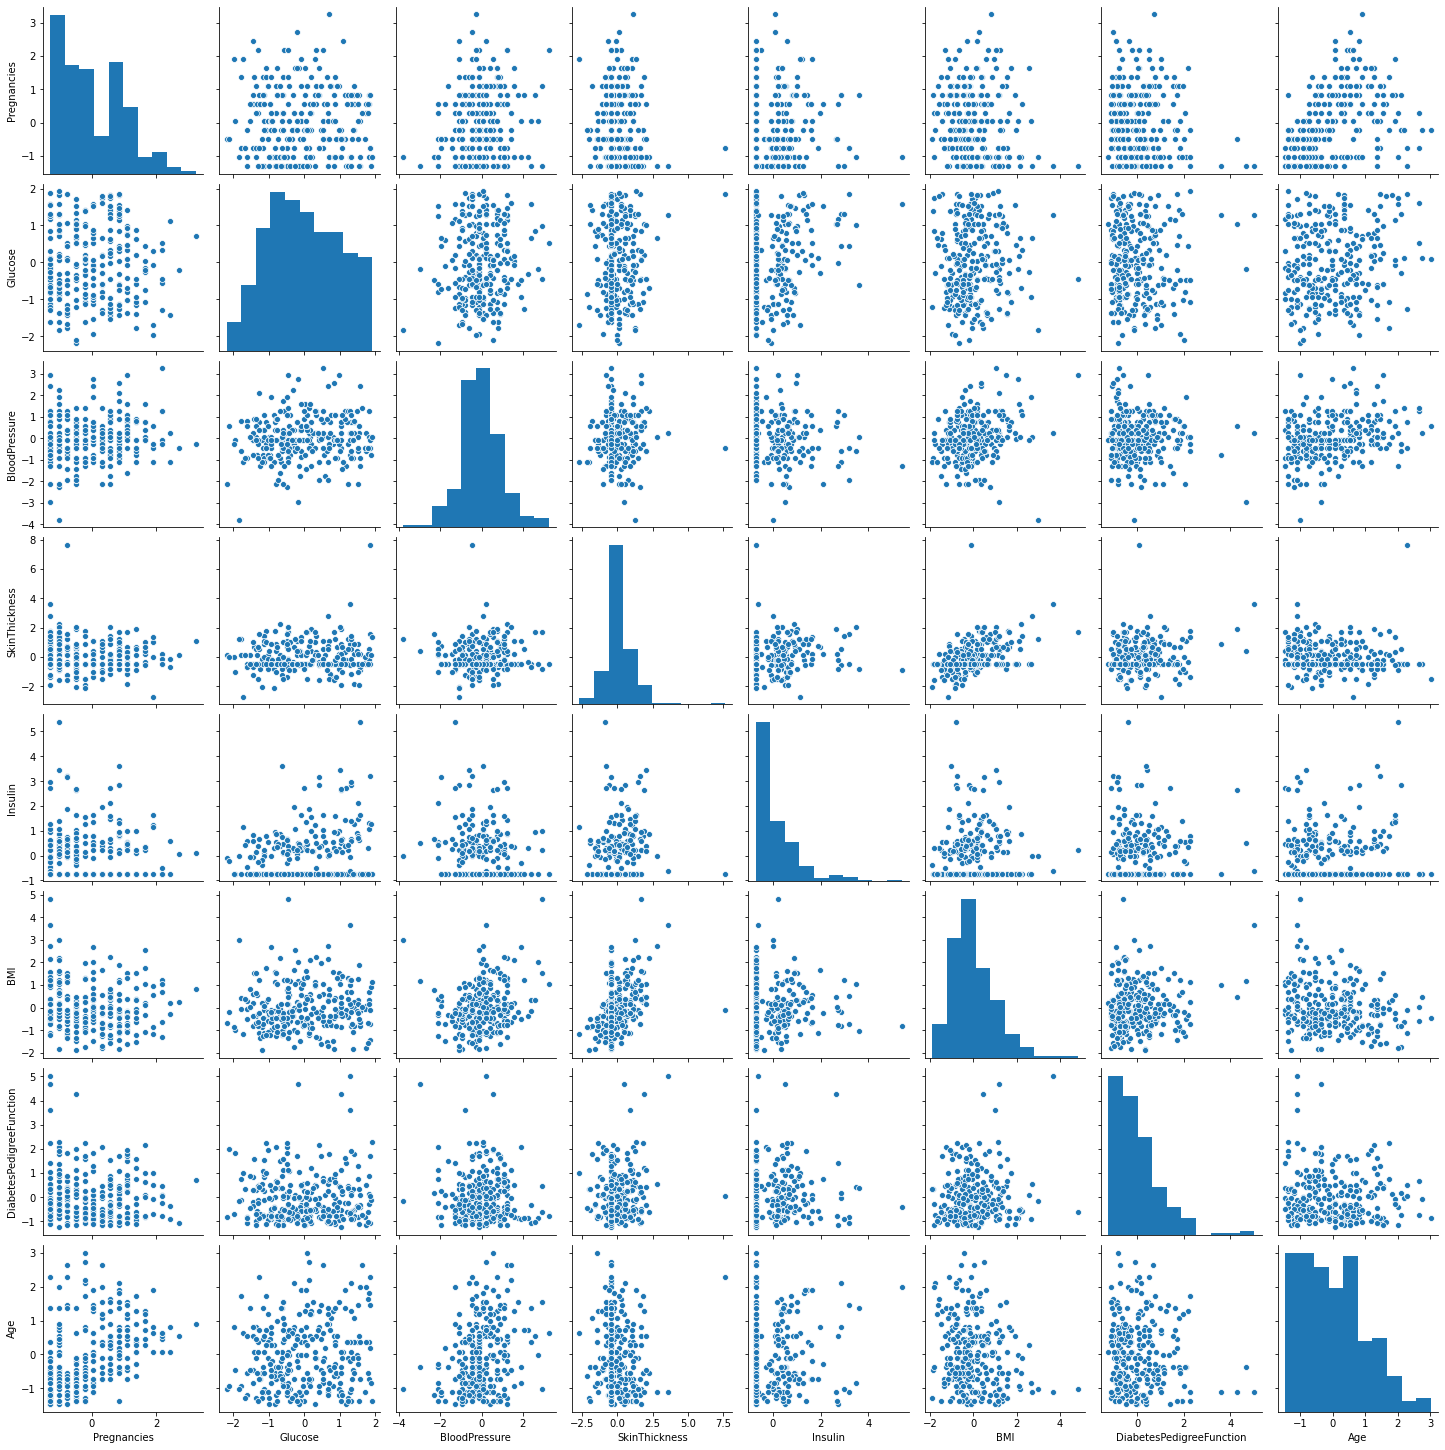

In [4]:
import seaborn as sns
sns.pairplot(df1,palette='coolwarm')

In [5]:
from sklearn.cluster import KMeans
df=pd.DataFrame(ac)
df.dropna(axis=0,inplace=True)
print(df)
df.info()
newdataset['weights']=ac
print(newdataset)

           0
0    -5.0245
1    -1.9265
2   -11.5520
3   -16.9295
4   -15.8450
..       ...
263 -11.3310
264  -9.5385
265  -4.3165
266  -4.4270
267 -14.7830

[268 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       268 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64             27        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88       

c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


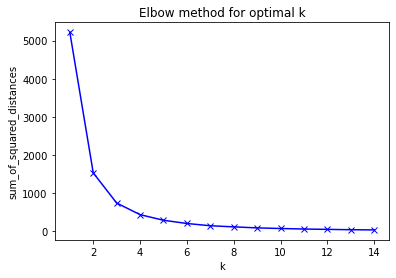

In [6]:
l=np.array(ac).reshape(-1,1)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(np.array(ac).reshape(-1,1)) 
    sum_of_squared_distances.append(k_means.inertia_)
          
            
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=4)

In [8]:
kmeans.fit_predict(l)
centroids=kmeans.cluster_centers_
ok=kmeans.labels_

0      -5.0245
2      -1.9265
4     -11.5520
6     -16.9295
8     -15.8450
        ...   
755   -11.3310
757    -9.5385
759    -4.3165
761    -4.4270
766   -14.7830
Name: weights, Length: 268, dtype: float64
     Severity of diabetes  weights
0                       0  -5.0245
2                       0  -1.9265
4                       1 -11.5520
6                       2 -16.9295
8                       2 -15.8450
..                    ...      ...
755                     1 -11.3310
757                     3  -9.5385
759                     0  -4.3165
761                     0  -4.4270
766                     2 -14.7830

[268 rows x 2 columns]
[[ -3.9939    ]
 [-12.30057639]
 [-16.21173864]
 [ -8.31826829]]


c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


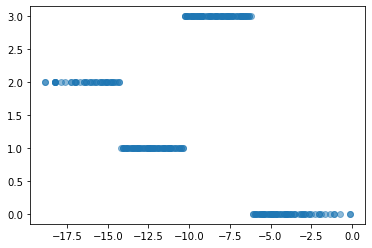

In [9]:
print(newdataset['weights'])
newdataset['Severity of diabetes']=ok
print(newdataset[['Severity of diabetes','weights']])
plt.scatter(newdataset['weights'],ok,alpha=0.5)
print(centroids)

In [10]:
newdataset['Severity of diabetes'].replace(to_replace =2, 
                 value ="LOW",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =1, 
                 value ="MODERATE",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =3, 
                 value ="HIGH",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =0, 
                 value ="ALARMING",inplace=True)

newdataset.dropna(axis=0,inplace=True)
newdataset.reset_index(drop=True,inplace=True)
    
print(newdataset.head(10))
print(newdataset['Outcome'].value_counts())
print(newdataset["Severity of diabetes"].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0  33.60   
1            8      183             64             27        0  23.30   
2            0      137             40             35      168  43.10   
3            3       78             50             32       88  31.00   
4            2      197             70             45      543  30.50   
5            8      125             96             27        0  34.25   
6           10      168             74             27        0  38.00   
7            1      189             60             23      846  30.10   
8            5      166             72             19      175  25.80   
9            7      100             74             27        0  30.00   

   DiabetesPedigreeFunction  Age  Outcome   winner  weights  \
0                     0.627   50        1   (2, 5)  -5.0245   
1                     0.672   32        1   (0, 3)  -1.9265   
2      

c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
!pip install pandas-profiling

You should consider upgrading via the 'c:\users\adhya rajesh\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [12]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
#Importing the Dataset

dataset = newdataset
#EDA using Pandas Profiling
file = ProfileReport(dataset)
file.to_file(output_file='output.html')



c:\users\adhya rajesh\appdata\local\programs\python\python36\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [13]:
for col in newdataset.columns: 
    print(col) 
    
print(newdataset.head())

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
winner
weights
Severity of diabetes
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            8      183             64             27        0  23.3   
2            0      137             40             35      168  43.1   
3            3       78             50             32       88  31.0   
4            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome   winner  weights  \
0                     0.627   50        1   (2, 5)  -5.0245   
1                     0.672   32        1   (0, 3)  -1.9265   
2                     2.288   33        1  (12, 0) -11.5520   
3                     0.248   26        1  (12, 9) -16.9295   
4                     0.158   53        1  (14, 4) -15.8450   

  Severity of diabetes  
0             ALARMING  
1    

In [14]:
X1 = dataset[dataset['Outcome']==0].iloc[:, :-1].values
y1 = dataset[dataset['Outcome']==0].iloc[:, -1].values

means = np.mean(X1, axis=0)
stds = np.std(X1, axis=0)
X1 = (X1 - means)/stds
newdataset=dataset[dataset['Outcome']==0]
print(X1)


# Training the SOM
from minisom import MiniSom

som = MiniSom(x=15, y=15, input_len=len(X.T),sigma=0.5,random_seed=10,learning_rate=1.8,
              neighborhood_function='gaussian')
som.random_weights_init(X1)
som.train_batch(X1, 10000, verbose=True)


som_shape=(15,15)
winner_coordinates = np.array([som.winner(x) for x in X1]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)



# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
win=[]
for i, x in enumerate(X1):
    w = som.winner(x)
    win.append(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y1[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

mappings = som.win_map(X1)

print(len(X1))
print(type(win))

newdataset['winner']=win

plt.figure(figsize=(8, 7))
frequencies = som.activation_response(X1)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.title("Frequency of choosing each winner neurons",fontsize=20)
plt.show()

print("length of X:",len(X1))



labels_map = som.labels_map(X1, y1)
label_names = np.unique(y1)

plt.figure(figsize=(10, 10))

sns.heatmap(dataset.corr(),annot=True)

C:\Users\Adhya Rajesh\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


ZeroDivisionError: division by zero

In [ ]:
import hebbian
import seaborn
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize

from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os

model1=hebbian.Hebbian(eta=0.0005,n_iter=1)



newdataset['winner']=win
pdf=pd.DataFrame(win,columns=['p1','p2'])


pdf1=pdf.iloc[:, :].values
print("this is pdf1", pdf1)
print("the weight assigned to each input feature of the winner neuron using hebbian rule :")
model1.fit((np.array(pdf1)),(np.array(newdataset1['Outcome'])))

ac=list(model1.net_input(np.array(pdf1)))
print("Net activation of every winner neuron from the input layer :",list(model1.net_input(np.array(pdf1))))
print("UPDATED WEIGHTS OF THE NETWORK",model1.w_)

In [ ]:
print(dataset.columns)
df1=pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
print(df1.describe())

In [ ]:
from sklearn.cluster import KMeans
df=pd.DataFrame(ac)
df.dropna(axis=0,inplace=True)
print(df)
df.info()
newdataset1['weights']=ac
print(newdataset1)

In [ ]:
kmeans=KMeans(n_clusters=4)


In [ ]:
l=np.array(ac).reshape(-1,1)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(np.array(ac).reshape(-1,1)) 
    sum_of_squared_distances.append(k_means.inertia_)
          
            
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [ ]:
kmeans.fit_predict(l)
centroids=kmeans.cluster_centers_
ok=kmeans.labels_

In [ ]:
print(newdataset1['weights'])
newdataset1['Severity of diabetes']=ok
print(newdataset1[['Severity of diabetes','weights']])
plt.scatter(newdataset1['weights'],ok,alpha=0.5)
print(centroids)

In [ ]:
newdataset1['Severity of diabetes'].replace(to_replace =0, 
                 value ="VERY LESS RISK",inplace=True)
newdataset1['Severity of diabetes'].replace(to_replace =2, 
                 value ="MODERATE RISK",inplace=True)
newdataset1['Severity of diabetes'].replace(to_replace =3, 
                 value ="HIGH RISK",inplace=True)
newdataset1['Severity of diabetes'].replace(to_replace =1, 
                 value ="CAN BE DIABETIC",inplace=True)

newdataset1.dropna(axis=0,inplace=True)
newdataset1.reset_index(drop=True,inplace=True)
    
print(newdataset1.head(10))
print(newdataset1['Outcome'].value_counts())
print(newdataset1["Severity of diabetes"].value_counts())

In [ ]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
#Importing the Dataset

dataset = newdataset1
#EDA using Pandas Profiling
file = ProfileReport(dataset)
file.to_file(output_file='output1.html')